In [1]:
!wget https://stringdb-static.org/download/protein.actions.v11.0/9606.protein.actions.v11.0.txt.gz 

--2022-05-19 23:12:39--  https://stringdb-static.org/download/protein.actions.v11.0/9606.protein.actions.v11.0.txt.gz
Resolving stringdb-static.org (stringdb-static.org)... 151.106.34.104
Connecting to stringdb-static.org (stringdb-static.org)|151.106.34.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14375773 (14M) [application/octet-stream]
Saving to: ‘9606.protein.actions.v11.0.txt.gz’

9606.protein.action 100%[===================>]  13.71M  14.3MB/s    in 1.0s    

2022-05-19 23:12:41 (14.3 MB/s) - ‘9606.protein.actions.v11.0.txt.gz’ saved [14375773/14375773]

--2022-05-19 23:12:41--  http://../datasets/biomedical/ppi/
Resolving .. (..)... failed: Name or service not known.
wget: unable to resolve host address ‘..’
FINISHED --2022-05-19 23:12:41--
Total wall clock time: 1.9s
Downloaded: 1 files, 14M in 1.0s (14.3 MB/s)


In [7]:
!wget https://stringdb-static.org/download/protein.sequences.v11.0/9606.protein.sequences.v11.0.fa.gz

--2022-05-19 23:16:29--  https://stringdb-static.org/download/protein.sequences.v11.0/9606.protein.sequences.v11.0.fa.gz
Resolving stringdb-static.org (stringdb-static.org)... 151.106.34.104
Connecting to stringdb-static.org (stringdb-static.org)|151.106.34.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6706087 (6.4M) [application/octet-stream]
Saving to: ‘9606.protein.sequences.v11.0.fa.gz’

9606.protein.sequen 100%[===================>]   6.39M  13.7MB/s    in 0.5s    

2022-05-19 23:16:30 (13.7 MB/s) - ‘9606.protein.sequences.v11.0.fa.gz’ saved [6706087/6706087]



In [2]:
!mv 9606.protein.actions.v11.0.txt.gz ../../datasets/biomedical/ppi/

In [8]:
!mv 9606.protein.sequences.v11.0.fa.gz ../../datasets/biomedical/ppi/

In [3]:
!gzip -d ../../datasets/biomedical/ppi/9606.protein.actions.v11.0.txt.gz

In [9]:
!gzip -d ../../datasets/biomedical/ppi/9606.protein.sequences.v11.0.fa.gz

In [4]:
!head ../../datasets/biomedical/ppi/9606.protein.actions.v11.0.txt

item_id_a	item_id_b	mode	action	is_directional	a_is_acting	score
9606.ENSP00000000233	9606.ENSP00000216366	binding		f	f	165
9606.ENSP00000000233	9606.ENSP00000216366	reaction		f	f	165
9606.ENSP00000000233	9606.ENSP00000216366	reaction		t	f	165
9606.ENSP00000000233	9606.ENSP00000216366	reaction		t	t	165
9606.ENSP00000000233	9606.ENSP00000222547	binding		f	f	913
9606.ENSP00000000233	9606.ENSP00000222547	catalysis		t	f	913
9606.ENSP00000000233	9606.ENSP00000222547	catalysis		t	t	913
9606.ENSP00000000233	9606.ENSP00000222547	reaction		f	f	913
9606.ENSP00000000233	9606.ENSP00000222547	reaction		t	f	913


In [10]:
!head ../../datasets/biomedical/ppi/9606.protein.sequences.v11.0.fa

>9606.ENSP00000000233
MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTIPTIGFNVETVEYKNICFTVWDVGGQDKIRPLWRH
YFQNTQGLIFVVDSNDRERVQESADELQKMLQEDELRDAVLLVFANKQDMPNAMPVSELTDKLGLQHLRSRTWYVQATCA
TQGTGLYDGLDWLSHELSKR
>9606.ENSP00000000412
MFPFYSCWRTGLLLLLLAVAVRESWQTEEKTCDLVGEKGKESEKELALVKRLKPLFNKSFESTVGQGSDTYIYIFRVCRE
AGNHTSGAGLVQINKSNGKETVVGRLNETHIFNGSNWIMLIYKGGDEYDNHCGKEQRRAVVMISCNRHTLADNFNPVSEE
RGKVQDCFYLFEMDSSLACSPEISHLSVGSILLVTFASLVAVYVVGGFLYQRLVVGAKGMEQFPHLAFWQDLGNLVADGC
DFVCRSKPRNVPAAYRGVGDDQLGEESEERDDHLLPM
>9606.ENSP00000001008


In [13]:
data_folder = "../../datasets/biomedical/ppi/"
ppi_data = "9606.protein.actions.v11.0.txt"
p_seq_data = "9606.protein.sequences.v11.0.fa"

# create protein to seqence mapping

with open(data_folder+p_seq_data) as f:
    lines = f.readlines()
    line_str = "".join(lines)
id_seq_str_list = line_str.split(">")
prot_id_to_seq = {}
for id_seq_str in id_seq_str_list:
    tokens = id_seq_str.split("\n")
    key = tokens[0]
    val = "".join(tokens[1:])
    prot_id_to_seq[key] = val


import pandas as pd
ppi_df = pd.read_csv(data_folder+ppi_data,sep='\t',header=0)
ppi_df

,item_id_a,item_id_b,mode,action,is_directional,a_is_acting,score
0,9606.ENSP00000000233,9606.ENSP00000216366,binding,NaN,f,f,165
1,9606.ENSP00000000233,9606.ENSP00000216366,reaction,NaN,f,f,165
2,9606.ENSP00000000233,9606.ENSP00000216366,reaction,NaN,t,f,165
3,9606.ENSP00000000233,9606.ENSP00000216366,reaction,NaN,t,t,165
4,9606.ENSP00000000233,9606.ENSP00000222547,binding,NaN,f,f,913
...,...,...,...,...,...,...,...
3470901,9606.ENSP00000485678,9606.ENSP00000409581,inhibition,inhibition,f,f,600
3470902,9606.ENSP00000485678,9606.ENSP00000409581,ptmod,NaN,f,f,600
3470903,9606.ENSP00000485678,9606.ENSP00000438346,activation,activation,t,f,900
3470904,9606.ENSP00000485678,9606.ENSP00000481878,activation,activation,f,f,600


In [29]:
ppi_df["item_seq_a"]=ppi_df["item_id_a"].apply(lambda x:prot_id_to_seq[x])
ppi_df["item_seq_b"]=ppi_df["item_id_b"].apply(lambda x:prot_id_to_seq[x])

In [31]:
ppi_df.to_csv(data_folder+"string_ppi.csv",index=None)

In [ ]:
len(set(ppi_df.item_id_a.unique()).union(set(ppi_df.item_id_b.unique())))

In [3]:
import pandas as pd
data_folder = "../data/"
ppi_df = pd.read_csv(data_folder+"string_ppi.csv")
ppi_df

,item_id_a,item_id_b,mode,action,is_directional,a_is_acting,score,item_seq_a,item_seq_b
0,9606.ENSP00000000233,9606.ENSP00000216366,binding,NaN,f,f,165,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MIKFFLMVNKQGQTRLSKYYEHVDINKRTLLETEVIKSCLSRSNEQ...
1,9606.ENSP00000000233,9606.ENSP00000216366,reaction,NaN,f,f,165,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MIKFFLMVNKQGQTRLSKYYEHVDINKRTLLETEVIKSCLSRSNEQ...
2,9606.ENSP00000000233,9606.ENSP00000216366,reaction,NaN,t,f,165,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MIKFFLMVNKQGQTRLSKYYEHVDINKRTLLETEVIKSCLSRSNEQ...
3,9606.ENSP00000000233,9606.ENSP00000216366,reaction,NaN,t,t,165,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MIKFFLMVNKQGQTRLSKYYEHVDINKRTLLETEVIKSCLSRSNEQ...
4,9606.ENSP00000000233,9606.ENSP00000222547,binding,NaN,f,f,913,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MRRAGLGEGVPPGNYGNYGYANSGYSACEEENERLTESLRSKVTAI...
...,...,...,...,...,...,...,...,...,...
3470901,9606.ENSP00000485678,9606.ENSP00000409581,inhibition,inhibition,f,f,600,MQPYTKNWTQVTEFVMMGFAGIHEAHLLFFILFLTMYLFTLVENLA...,MGDKGTRVFKKASPNGKLTVYLGKRDFVDHIDLVDPVDGVVLVDPE...
3470902,9606.ENSP00000485678,9606.ENSP00000409581,ptmod,NaN,f,f,600,MQPYTKNWTQVTEFVMMGFAGIHEAHLLFFILFLTMYLFTLVENLA...,MGDKGTRVFKKASPNGKLTVYLGKRDFVDHIDLVDPVDGVVLVDPE...
3470903,9606.ENSP00000485678,9606.ENSP00000438346,activation,activation,t,f,900,MQPYTKNWTQVTEFVMMGFAGIHEAHLLFFILFLTMYLFTLVENLA...,MQKVLSNGQTEEVRSGSRLIFGTLYPAYYSYKAVKSKDIKEYVKWM...
3470904,9606.ENSP00000485678,9606.ENSP00000481878,activation,activation,f,f,600,MQPYTKNWTQVTEFVMMGFAGIHEAHLLFFILFLTMYLFTLVENLA...,MSELDQLRQEAEQLKNQIRDARKACADATLSQITNNIDPVGRIQMR...


In [10]:
ppi_df_900 = ppi_df[ppi_df["score"]>=900]
ppi_df_900
ppi_df_900.to_csv(data_folder+"string_ppi_900_2m.csv",index=None)

In [11]:
len(ppi_df_900.index)

2004588

In [15]:
ppi_df_920 = ppi_df[ppi_df["score"]>=920]
ppi_df_920

,item_id_a,item_id_b,mode,action,is_directional,a_is_acting,score,item_seq_a,item_seq_b
27,9606.ENSP00000000233,9606.ENSP00000249923,binding,NaN,f,f,923,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MTAAENVCYTLINVPMDSEPPSEISLKNDLEKGDVKSKTEALKKVI...
28,9606.ENSP00000000233,9606.ENSP00000249923,catalysis,NaN,t,f,923,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MTAAENVCYTLINVPMDSEPPSEISLKNDLEKGDVKSKTEALKKVI...
29,9606.ENSP00000000233,9606.ENSP00000249923,catalysis,NaN,t,t,923,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MTAAENVCYTLINVPMDSEPPSEISLKNDLEKGDVKSKTEALKKVI...
30,9606.ENSP00000000233,9606.ENSP00000249923,reaction,NaN,f,f,923,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MTAAENVCYTLINVPMDSEPPSEISLKNDLEKGDVKSKTEALKKVI...
31,9606.ENSP00000000233,9606.ENSP00000249923,reaction,NaN,t,f,923,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MTAAENVCYTLINVPMDSEPPSEISLKNDLEKGDVKSKTEALKKVI...
...,...,...,...,...,...,...,...,...,...
3470851,9606.ENSP00000485663,9606.ENSP00000472985,reaction,NaN,t,t,961,MSYPADDYESEAAYDPYAYPSDYDMHTGDPKQDLAYERQYEQQTYQ...,MTEWETAAPAVAETPDIKLFGKWSTDDVQINDISLQDYIAVKEKYA...
3470860,9606.ENSP00000485663,9606.ENSP00000481646,binding,NaN,f,f,941,MSYPADDYESEAAYDPYAYPSDYDMHTGDPKQDLAYERQYEQQTYQ...,MLMPKKNRIAIYELLFKEGVMVAKKDVHMPKHPELADKNVPNLHVM...
3470861,9606.ENSP00000485663,9606.ENSP00000481646,reaction,NaN,f,f,941,MSYPADDYESEAAYDPYAYPSDYDMHTGDPKQDLAYERQYEQQTYQ...,MLMPKKNRIAIYELLFKEGVMVAKKDVHMPKHPELADKNVPNLHVM...
3470862,9606.ENSP00000485663,9606.ENSP00000481646,reaction,NaN,t,f,941,MSYPADDYESEAAYDPYAYPSDYDMHTGDPKQDLAYERQYEQQTYQ...,MLMPKKNRIAIYELLFKEGVMVAKKDVHMPKHPELADKNVPNLHVM...


In [16]:
ppi_df_920.to_csv(data_folder+"string_ppi_920_300k.csv",index=None)

In [2]:
import pandas as pd
data_folder = "../../data/pretrain/"
ppi_df = pd.read_csv(data_folder+"string_ppi.csv")
ppi_df

,item_id_a,item_id_b,mode,action,is_directional,a_is_acting,score,item_seq_a,item_seq_b
0,9606.ENSP00000000233,9606.ENSP00000216366,binding,NaN,f,f,165,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MIKFFLMVNKQGQTRLSKYYEHVDINKRTLLETEVIKSCLSRSNEQ...
1,9606.ENSP00000000233,9606.ENSP00000216366,reaction,NaN,f,f,165,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MIKFFLMVNKQGQTRLSKYYEHVDINKRTLLETEVIKSCLSRSNEQ...
2,9606.ENSP00000000233,9606.ENSP00000216366,reaction,NaN,t,f,165,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MIKFFLMVNKQGQTRLSKYYEHVDINKRTLLETEVIKSCLSRSNEQ...
3,9606.ENSP00000000233,9606.ENSP00000216366,reaction,NaN,t,t,165,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MIKFFLMVNKQGQTRLSKYYEHVDINKRTLLETEVIKSCLSRSNEQ...
4,9606.ENSP00000000233,9606.ENSP00000222547,binding,NaN,f,f,913,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MRRAGLGEGVPPGNYGNYGYANSGYSACEEENERLTESLRSKVTAI...
...,...,...,...,...,...,...,...,...,...
3470901,9606.ENSP00000485678,9606.ENSP00000409581,inhibition,inhibition,f,f,600,MQPYTKNWTQVTEFVMMGFAGIHEAHLLFFILFLTMYLFTLVENLA...,MGDKGTRVFKKASPNGKLTVYLGKRDFVDHIDLVDPVDGVVLVDPE...
3470902,9606.ENSP00000485678,9606.ENSP00000409581,ptmod,NaN,f,f,600,MQPYTKNWTQVTEFVMMGFAGIHEAHLLFFILFLTMYLFTLVENLA...,MGDKGTRVFKKASPNGKLTVYLGKRDFVDHIDLVDPVDGVVLVDPE...
3470903,9606.ENSP00000485678,9606.ENSP00000438346,activation,activation,t,f,900,MQPYTKNWTQVTEFVMMGFAGIHEAHLLFFILFLTMYLFTLVENLA...,MQKVLSNGQTEEVRSGSRLIFGTLYPAYYSYKAVKSKDIKEYVKWM...
3470904,9606.ENSP00000485678,9606.ENSP00000481878,activation,activation,f,f,600,MQPYTKNWTQVTEFVMMGFAGIHEAHLLFFILFLTMYLFTLVENLA...,MSELDQLRQEAEQLKNQIRDARKACADATLSQITNNIDPVGRIQMR...


/root/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


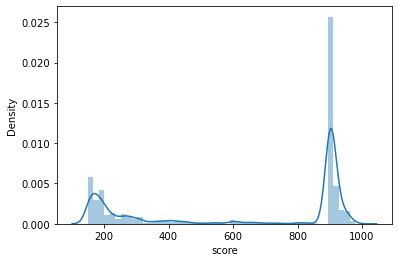

In [4]:
import seaborn as sns, numpy as np
ax = sns.distplot(ppi_df["score"])